In [1]:
from src.data_loader import UCF101_Dataset_Loader
from src.training import DEVICE, Mixed_Precision_Single_Core_Trainer
from src.model_architectures import VGG3D
from src.utils import plot_metrics

import torch
import numpy as np

from tqdm import tqdm

In [2]:
torch.backends.cuda.max_split_size = 512

In [3]:
ucf_data_dir = "data/BG_Mask_Full_data/"
ucf_label_dir = "data/ucfTrainTestlist/"
frames_per_clip = 16
step_between_clips = 1

height = 64
width = 64

batch_size = 64

In [4]:
ucf101 = UCF101_Dataset_Loader(ucf_data_dir, ucf_label_dir, frames_per_clip, step_between_clips, height, width, batch_size)

Loading Training Data .........


100%|██████████| 85/85 [00:01<00:00, 55.61it/s]


Loading Testing Data .........


100%|██████████| 85/85 [00:01<00:00, 56.88it/s]



Total number of train samples: 6633
Total number of test samples: 2532
Total number of (train) batches: 104
Total number of (test) batches: 40


Total Number of Classes: 10


### Model Training

In [5]:
torch.manual_seed(69)
vgg_model = VGG3D((frames_per_clip, height, width), len(ucf101.classes)).to(device=DEVICE)
vgg_model

VGG3D(
  (max_pool): MaxPool3d(kernel_size=3, stride=2, padding=(1, 1, 1), dilation=1, ceil_mode=False)
  (conv1): Conv3d(3, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 0, 0))
  (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 2, 2))
  (conv3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv4): Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv5): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv6): Conv3d(256, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv7): Conv3d(256, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 4, 4))
  (conv8): Conv3d(512, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv9): Conv3d(512, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 4, 4))
  (conv10): Conv3d(512, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (linear1): Linear(i

In [6]:
EPOCHS = 10
optimizer = torch.optim.Adam(vgg_model.parameters(), lr=5e-6)
mp_trainer = Mixed_Precision_Single_Core_Trainer(len(ucf101.classes))

In [7]:
output_metrics = mp_trainer.training_loop(vgg_model,ucf101.train_loader,ucf101.test_loader,EPOCHS, optimizer)

100%|██████████| 40/40 [02:47<00:00,  4.18s/it]


For Epoch 1 We Train Loss:2.2616735857266645, Test Loss:2.3344279527664185, Train Accuracy:0.11535923928022385, Test Accuracy:0.06694345339201391


100%|██████████| 40/40 [02:40<00:00,  4.01s/it]


For Epoch 2 We Train Loss:2.046406177374033, Test Loss:2.3569995880126955, Train Accuracy:0.31387984910263467, Test Accuracy:0.05323830023407936


100%|██████████| 40/40 [02:44<00:00,  4.11s/it]


For Epoch 3 We Train Loss:1.9739013612270355, Test Loss:2.2953000009059905, Train Accuracy:0.3760783855731671, Test Accuracy:0.1285758163779974


100%|██████████| 40/40 [02:43<00:00,  4.09s/it]


For Epoch 4 We Train Loss:1.959536850452423, Test Loss:2.2999847173690795, Train Accuracy:0.38390037789940834, Test Accuracy:0.12011855756863951


100%|██████████| 40/40 [02:46<00:00,  4.16s/it]


For Epoch 5 We Train Loss:1.9482248115998049, Test Loss:2.2969713032245638, Train Accuracy:0.39624301286844105, Test Accuracy:0.14490075390785934


100%|██████████| 40/40 [02:48<00:00,  4.21s/it]


For Epoch 6 We Train Loss:1.9415651961014821, Test Loss:2.2769040882587435, Train Accuracy:0.3973060069748989, Test Accuracy:0.15376326255500317


100%|██████████| 40/40 [03:15<00:00,  4.88s/it]


For Epoch 7 We Train Loss:1.932037557546909, Test Loss:2.274164617061615, Train Accuracy:0.4032738971022459, Test Accuracy:0.14956374811008571


100%|██████████| 40/40 [02:40<00:00,  4.01s/it]


For Epoch 8 We Train Loss:1.9279939944927509, Test Loss:2.262348985671997, Train Accuracy:0.40880342515615314, Test Accuracy:0.16379245901480316


100%|██████████| 40/40 [02:40<00:00,  4.02s/it]


For Epoch 9 We Train Loss:1.9209886835171626, Test Loss:2.2474119424819947, Train Accuracy:0.41214073592653644, Test Accuracy:0.1780460190027952


100%|██████████| 40/40 [02:39<00:00,  4.00s/it]

For Epoch 10 We Train Loss:1.9136072443081782, Test Loss:2.241099935770035, Train Accuracy:0.4176792935110055, Test Accuracy:0.17995593454688788


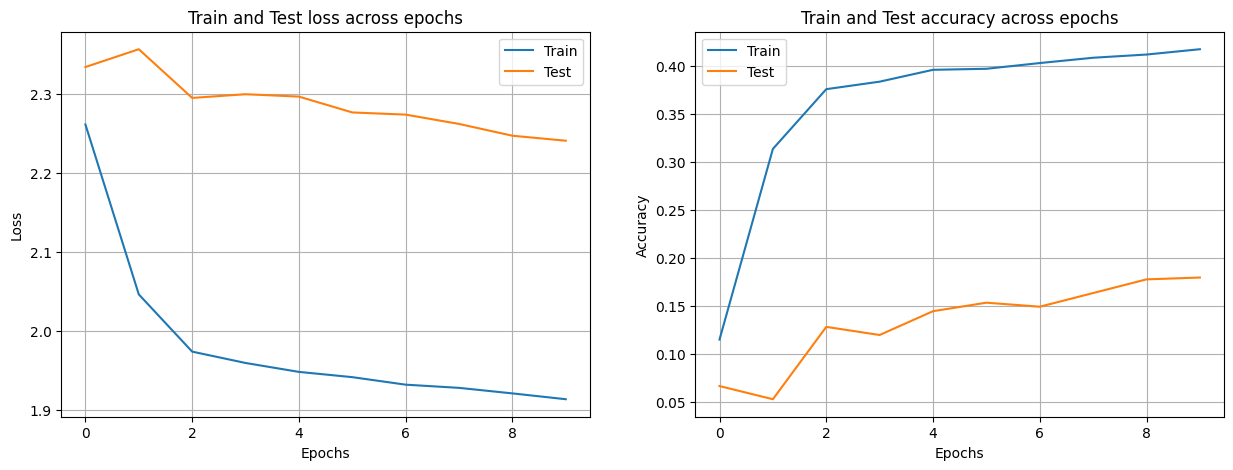

In [8]:
plot_metrics(EPOCHS, output_metrics)

In [9]:
torch.save(vgg_model.state_dict(), 'models/vgg_bg_mask_data.pth')